### Bayesian Data Analysis, 3rd ed
## Chapter 2, demo 1

원저자:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>

2차저자:
- 문현지,민태규

Probability of a girl birth given placenta previa (BDA3 p. 37).
437 girls and 543 boys have been observed. Calculate and plot the posterior distribution of the proportion of girls $\theta $, using
uniform prior on $\theta $.

In [1]:
# 필요한 패키지들을 import합니다.

# plotting
%matplotlib inline
import matplotlib.pyplot as plt

# fast array routines for numerical calculation
import numpy as np
# scipy contains various scietific tools, such as beta distribution
from scipy.stats import beta

In [2]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# 기본 plot 세팅을 변경하겠습니다. 폰트 사이즈를 12로 설정합니다.
plt.rc('font', size=12)

The posterior distribution is Beta(438, 544). Plot the distribution.

Uniform prior -> Posterior is Beta(438,544)


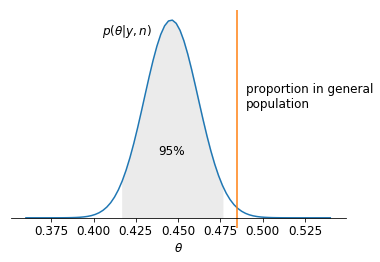

In [24]:
#그래프를 그릴 겁니다. x축의 시작점을 0.36, 끝점을 0.54로 설정하고, 총 80개의 점(표본)을 찍을 건데, 
x = np.linspace(0.36, 0.54, 80)

#주어진 파라미터는 다음과 같습니다: alpha = 438, beta = 544
#이 값을 파라미터로 갖는 베타분포를 만듭니다.
dist = beta(438, 544)

# 위 베타분포의 확률밀도함수를 
pd = dist.pdf(x)

print('Uniform prior -> Posterior is Beta(438,544)')

# 위 베타분포의 확률밀도함수를 좌표평면 상에 그래프로 나타냅니다.
plt.plot(x, pd)

# 그래프를 깔끔하게 만들고 싶습니다. x축만 보이고, 나머지는 안 보이도록 합니다.
plot_tools.modify_axes.only_x()

# annotate the line
plt.annotate(
    r'$p(\theta|y,n)$',
    (x[35] - 0.005, pd[35]),
    ha='right'  # horizontalalignment
)

# 전체 인구중 여아의 비율을 수직선으로 나타냅니다.
# ``color='C1'`` corresponds to default color #2
plt.axvline(0.485, color='C1')

#수직선 약간(0.005만큼) 오른쪽에 수직선에 대한 설명을 써넣습니다.
plt.annotate(
    'proportion in general\npopulation',
    (0.485 + 0.005, 14),
    ha='left' #왼쪽 정렬
)

#ppf는 percent point function의 약자로, ppf는 누적분포함수(CDF)의 역함수입니다.
#하위 2.5%, 상위 2.5%(하위 97.5%)에 해당하는 x값의 범위를 찾습니다.
x_95_idx = (x > dist.ppf(0.025)) & (x < dist.ppf(0.975))

# 그래프에서 신용구간 95%에 해당하는 부분을 음영처리합니다.
plt.fill_between(x[x_95_idx], pd[x_95_idx], color='0.92')

#음영처리된 부분의 (중앙값, 8)위치에 '95%'라고 써넣습니다. 정렬방식은 '가운데 정렬'입니다.
plt.text(dist.median(), 8, "95%", horizontalalignment='center')

# x축에 세타 기호를 입력합니다.
plt.xlabel(r'$\theta$')

# 데이터에 알맞게 x축 길이를 조정합니다.(큰 변화는 없습니다만)
plt.autoscale(axis='x', tight=True);
# 주의: (바로 윗줄) 마지막에 써넣은 세미콜론 ;은 jupyter notebook에서 autoscale 함수 실행시 return값이 출력되는 걸 방지하기 위함.